<a href="https://colab.research.google.com/github/HareeshVutla/Deeplearning/blob/main/Iris_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np


# **Import data**

In [ ]:
iris = datasets.load_iris()
iris

In [25]:
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y.columns = ['Targets']

In [49]:

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Build K model**

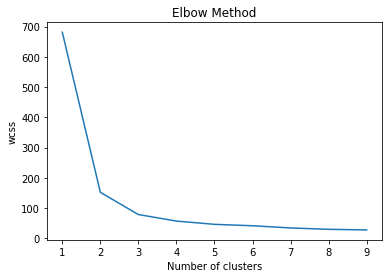

In [27]:
epochs = 10
wcss = []

for i in range(1,epochs):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,epochs),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
model = KMeans (n_clusters = 3)
model.fit(X)


colormap = np.array(['red','lime','black'])


Text(0, 0.5, 'petal width')

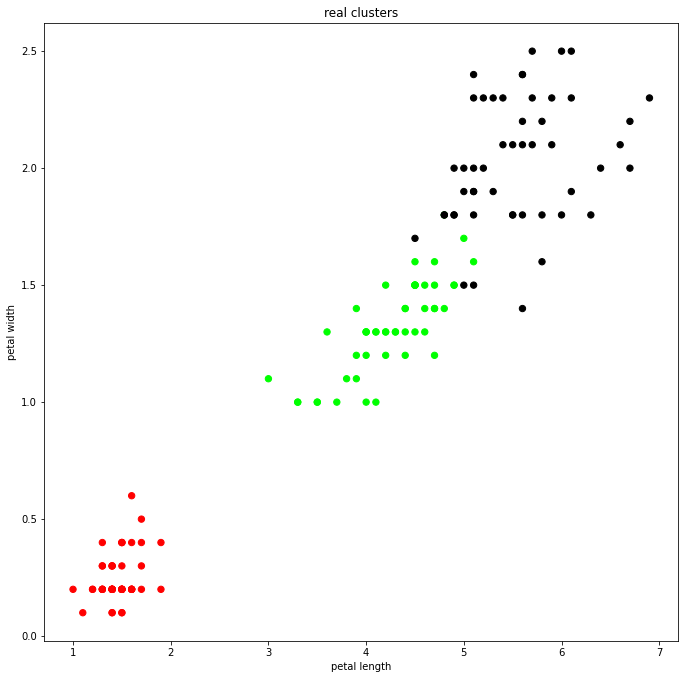

In [43]:
plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
plt.scatter(X.petal_length, X.petal_width, c =colormap [y.Targets], s=40)
plt.title('real clusters')
plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0, 0.5, 'petal width')

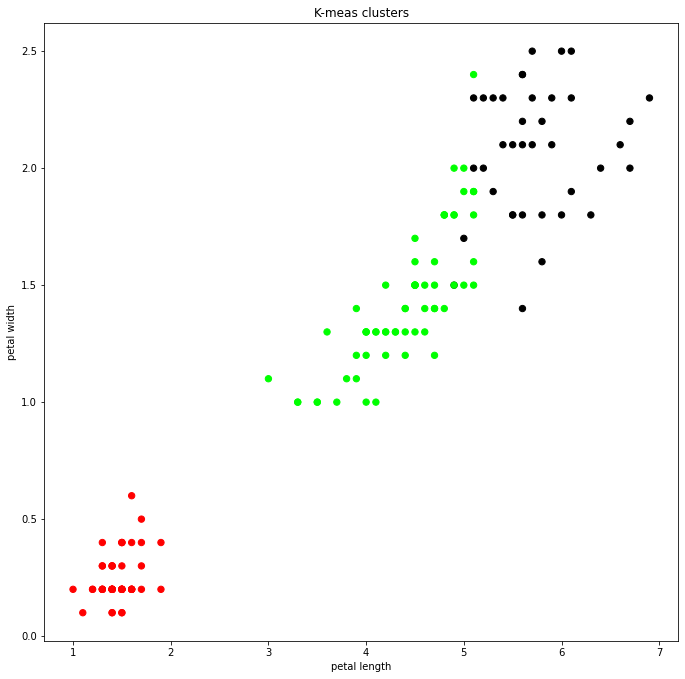

In [45]:
plt.figure(figsize=(25,25))
plt.subplot(2,2,2)
plt.scatter(X.petal_length, X.petal_width, c =colormap[model.labels_], s=40)
plt.title('K-meas clusters')
plt.xlabel('petal length')
plt.ylabel('petal width')

In [38]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

In [41]:
xs.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


Text(0, 0.5, 'petal width')

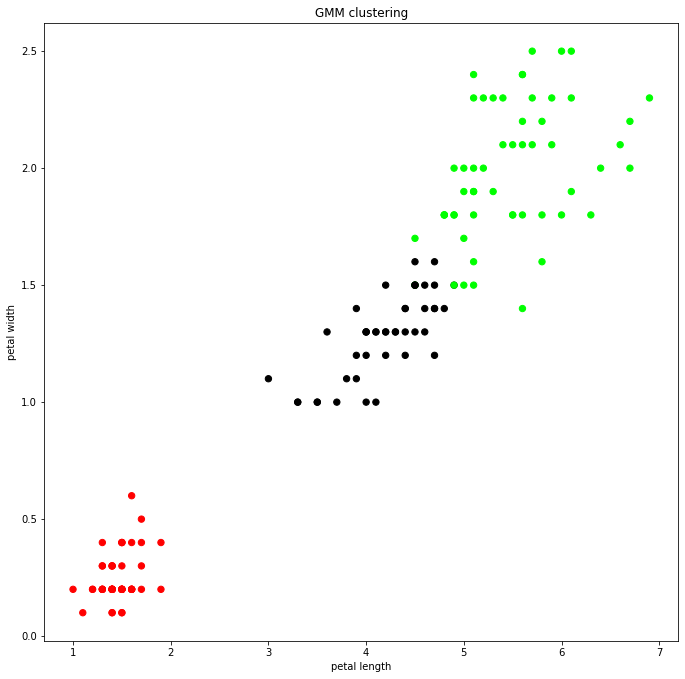

In [51]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture (n_components=3)
gmm.fit(xs)

gmm_y = gmm.predict(xs)
plt.figure(figsize=(25,25))
plt.subplot(2,2,3)
plt.scatter(X.petal_length, X.petal_width, c=colormap [gmm_y],s=40)
plt.title('GMM clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
